In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV


data = pd.read_csv('data_6.txt') 

# Part 3

***Exercise 3.2***

In [2]:
data_set = data
data_set = data_set[data_set['is_recid'] != -1]
data_set = data_set[data_set['days_b_screening_arrest'] <= 30]
data_set = data_set.drop(['is_recid', 'c_charge_degree', 'days_b_screening_arrest'], axis=1)

print(data_set['two_year_recid'])

0       0
1       1
2       1
5       0
6       1
       ..
7209    0
7210    0
7211    0
7212    0
7213    1
Name: two_year_recid, Length: 6623, dtype: int64


0.4538728672806885


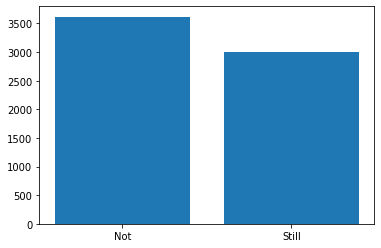

In [3]:
data_set_recid = (data_set['two_year_recid'] == 1).sum()
data_set_nrecid = (data_set['two_year_recid'] == 0).sum()
data_set_ifrecid = [data_set_nrecid, data_set_recid]
print(data_set_recid/(len(data_set['two_year_recid'])))

#bar chart
height = data_set_ifrecid
bars = ('Not', 'Still')
y_pos = np.arange(len(bars))

# Create bars
plt.bar(y_pos, height)

# Create names on the x-axis
plt.xticks(y_pos, bars)

# Show graphic
plt.show()

Female: 0.3586530931871574
Male: 0.4766180321735877


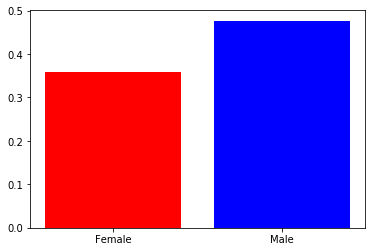

In [4]:
#Female
data_set_female = data_set[data_set['sex'] == 'Female']
N_data_set_female = len(data_set_female)

data_set_recid_female = data_set_female[data_set_female['two_year_recid'] == 1]
N_data_set_recid_female = len(data_set_recid_female)

ratio_of_recid_female = N_data_set_recid_female/N_data_set_female

#Male
data_set_male = data_set[data_set['sex'] == 'Male']
N_data_set_male = len(data_set_male)

data_set_recid_male = data_set_male[data_set_male['two_year_recid'] == 1]
N_data_set_recid_male = len(data_set_recid_male)

ratio_of_recid_male = N_data_set_recid_male/N_data_set_male


print("Female: " + str(ratio_of_recid_female))
print("Male: " + str(ratio_of_recid_male))


#bar chart
Sex = [ratio_of_recid_female, ratio_of_recid_male]
height = Sex
bars = ('Female', 'Male')
y_pos = np.arange(len(bars))

# Create bars
plt.bar(y_pos, height, color=['red', 'blue'])

# Create names on the x-axis
plt.xticks(y_pos, bars)

# Show graphic
plt.show()

               race  Count  Count_Recid     ratio
0  African-American   3379         1758  0.520272
1             Asian     32            9  0.281250
2         Caucasian   2291          901  0.393278
3          Hispanic    557          205  0.368043
4   Native American     13            7  0.538462
5             Other    351          126  0.358974


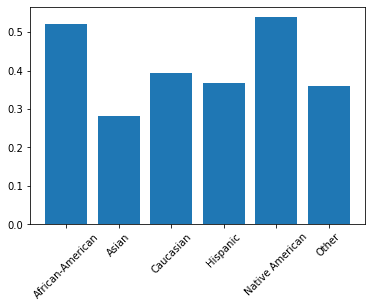

In [5]:
data_set_recid = data_set[data_set['two_year_recid'] == 1]

race_grouped_data = data_set.groupby(['race']).size().reset_index(name="Count")
race_grouped_data_recid = data_set_recid.groupby(['race']).size().reset_index(name="Count_Recid")
ratio_race_grouped_data = race_grouped_data.merge(race_grouped_data_recid, how='inner', left_index=False, right_index=False)
ratio_race_grouped_data['ratio'] = ratio_race_grouped_data['Count_Recid']/ratio_race_grouped_data['Count']

print(ratio_race_grouped_data)

#bar chart
height = ratio_race_grouped_data['ratio']
bars = ratio_race_grouped_data['race']
y_pos = np.arange(len(bars))

# Create bars
plt.bar(y_pos, height)

# Create names on the x-axis
plt.xticks(y_pos, bars, rotation=45)

# Show graphic
plt.show()

[0, 20)      0.969697
[20, 30)     0.536984
[30, 40)     0.447154
[40, 50)     0.356549
[50, 60)     0.324763
[60, 70)     0.253731
[70, 80)     0.142857
[80, 90)     0.000000
[90, 100)    1.000000
Name: age, dtype: float64


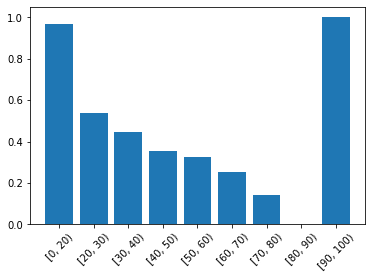

In [6]:
data_set_recid = data_set[data_set['two_year_recid'] == 1]

bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100]
segments = pd.cut(data_set['age'], bins, right=False)
segments_recid = pd.cut(data_set_recid['age'], bins, right=False)
segments_count = pd.value_counts(segments, sort=False)
segments_recid_count = pd.value_counts(segments_recid, sort=False)

ratio_segments = segments_recid_count/segments_count

print(ratio_segments)

#bar chart
height = ratio_segments
y_pos = ratio_segments.index.astype(str)

# Create bars
plt.bar(y_pos, height)

plt.xticks(rotation=45)

# Show graphic
plt.show()

In [15]:
data_set_new = data_set.loc[:, ['sex', 'age', 'race', 'two_year_recid']]
#print(data_set_new)

data_set_oneHotEncoding = pd.get_dummies(data_set_new)
data_set_oneHotEncoding.dropna(axis=1, how='any', inplace=True)
print(data_set_oneHotEncoding)

      age  two_year_recid  sex_Female  sex_Male  race_African-American  \
0      69               0           0         1                      0   
1      34               1           0         1                      1   
2      24               1           0         1                      1   
5      44               0           0         1                      0   
6      41               1           0         1                      0   
...   ...             ...         ...       ...                    ...   
7209   23               0           0         1                      1   
7210   23               0           0         1                      1   
7211   57               0           0         1                      0   
7212   33               0           1         0                      1   
7213   23               1           1         0                      0   

      race_Asian  race_Caucasian  race_Hispanic  race_Native American  \
0              0               0      

In [16]:
# Labels that we want to predict
labels = np.array(data_set_oneHotEncoding['two_year_recid'])

data_set_oneHotEncoding_x = data_set_oneHotEncoding.drop('two_year_recid', axis=1)

data_set_oneHotEncoding_x_list = list(data_set_oneHotEncoding_x.columns)
data_set_oneHotEncoding_x = np.array(data_set_oneHotEncoding_x)

x_train, x_test, y_train, y_test = train_test_split(data_set_oneHotEncoding_x, labels, test_size=0.3, random_state=42)

print('Training Features Shape:', x_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', x_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (4636, 9)
Training Labels Shape: (4636,)
Testing Features Shape: (1987, 9)
Testing Labels Shape: (1987,)


In [27]:
forest = ensemble.RandomForestClassifier(n_estimators = 1000, random_state=42)
forest_fit = forest.fit(x_train , y_train)
y_test_predicted = forest.predict(x_test)

accuracy = metrics.accuracy_score(y_test, y_test_predicted)
print("Accurancy: " + str(accuracy) + "\n")

print("Confusion Metrix: ")
print(confusion_matrix(y_test, y_test_predicted))
print()

print("Classification Report: \n")
print(classification_report(y_test, y_test_predicted))

Accurancy: 0.5787619526925013

Confusion Metrix: 
[[658 408]
 [429 492]]

Classification Report: 

              precision    recall  f1-score   support

           0       0.61      0.62      0.61      1066
           1       0.55      0.53      0.54       921

    accuracy                           0.58      1987
   macro avg       0.58      0.58      0.58      1987
weighted avg       0.58      0.58      0.58      1987



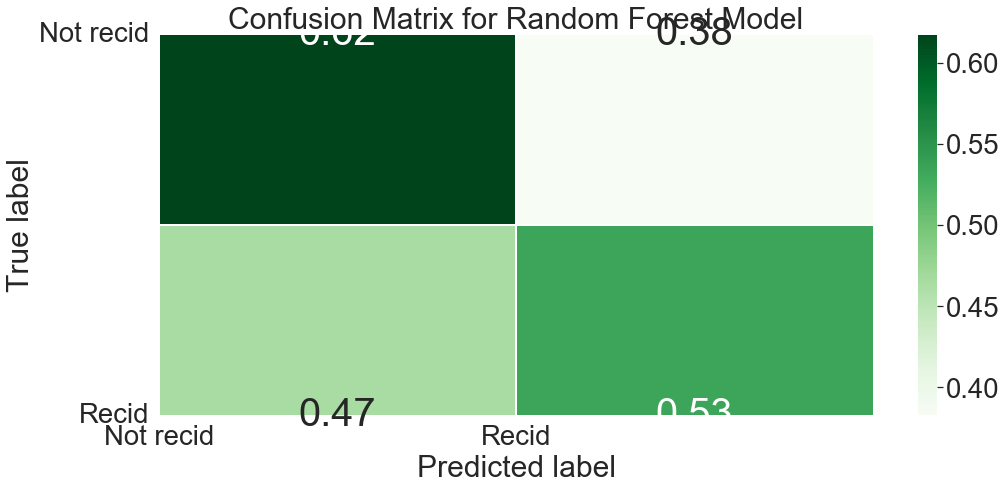

In [47]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_test_predicted)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=2.5)
annot_kws = {"ha": 'center',"va": 'center'}
sns.heatmap(matrix, annot=True, annot_kws={'size':40}, cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['Not recid', 'Recid']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=0)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [52]:
#RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(random_grid)

Parameters currently in use:

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [53]:
# Use the random grid to search for best hyperparameters
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
forest_random = RandomizedSearchCV(estimator = forest, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
forest_random.fit(x_train, y_train)

print(forest_random.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
{'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': True}


# Evaluate Random Search

In [55]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

base_model = RandomForestClassifier(n_estimators = 10, random_state = 42)
base_model.fit(x_train, y_train)
base_accuracy = evaluate(base_model, x_test, y_test)

best_random = forest_random.best_estimator_
random_accuracy = evaluate(best_random, x_test, y_test)
                           
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Model Performance
Average Error: 0.4288 degrees.
Accuracy = nan%.
Model Performance
Average Error: 0.4061 degrees.
Accuracy = nan%.
Improvement of nan%.


C:\Users\Jennifer\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
C:\Users\Jennifer\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
C:\Users\Jennifer\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
C:\Users\Jennifer\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
